# Ayudantía 10 – IIQ2113: Diseño y Operación de Biorreactores

Ayudante: Emilia Violic Montalba - eviolic@uc.cl

Para abrir en Google Colab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/SysBioengLab/IIQ2113-Chemical-reactor-design/blob/main/Ayudantias/Ayudantia10_IIQ2113.ipynb)

## Problema 1: Operación Batch

d) Modelaremos la fermentación de glucosa con levaduras en un reactor batch, aplicando la cinética de Monod.

**Ecuaciones del modelo Batch:**

$$
\dfrac{dX}{dt} = \mu X \\
\dfrac{dS}{dt} = -\dfrac{\mu}{Y_{X/S}}\dfrac{dX}{dt} \\
\dfrac{dP}{dt} = \dfrac{\mu}{Y_{X/P}}\dfrac{dX}{dt}
$$

donde
$$
\mu = \mu_{\text{máx}}\dfrac{S}{K_S + S}\
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#  Parámetros del problema
mu_max = 1.79      # [1/h]
Ks = 0.9           # [g/L]
Yxs = 0.607        # [gX/gS]
Yxp = 0.435        # [gX/gP]
S0 = 100.0         # [g/L]
X0 = 0.2           # [g/L]
P0 = 0.0           # [g/L]
V = 300            # [L]


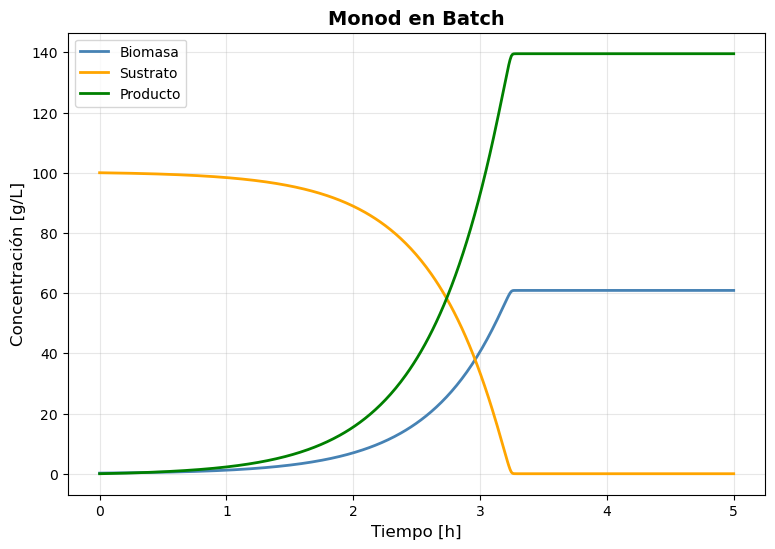

In [2]:
def batch_model(t, y):
    X, S, P = y
    if S <= 0:
        mu = 0
        S = 0
    else:
        mu = mu_max * S / (Ks + S)
    dXdt = mu * X
    dSdt = -(1/Yxs) * dXdt
    dPdt = (1/Yxp) * dXdt
    return [dXdt, dSdt, dPdt]

# Evento: detener integración cuando S≈0
def stop_when_S_zero(t, y):
    return y[1]
stop_when_S_zero.terminal = True
stop_when_S_zero.direction = -1

# Condiciones iniciales
y0 = [X0, S0, P0]

# Intervalo más corto y pasos finos
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolver
sol = solve_ivp(batch_model, t_span, y0, t_eval=t_eval,
                events=stop_when_S_zero, max_step=0.01)

# Graficar resultados
plt.figure(figsize=(9,6))
plt.plot(sol.t, sol.y[0], color='steelblue', label='Biomasa', linewidth=2)
plt.plot(sol.t, sol.y[1], color='orange', label='Sustrato', linewidth=2)
plt.plot(sol.t, sol.y[2], color='green', label='Producto', linewidth=2)
plt.xlabel('Tiempo [h]', fontsize=12)
plt.ylabel('Concentración [g/L]', fontsize=12)
plt.title('Monod en Batch', fontsize=14, weight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



El gráfico muestra el comportamiento típico de una fermentación microbiana en un sistema batch modelado con la cinética de Monod.

Al inicio, la concentración de sustrato (curva naranja) es alta y se va consumiendo progresivamente a medida que las levaduras lo utilizan como fuente de energía y carbono. En paralelo, la biomasa (curva azul) crece de forma exponencial mientras hay sustrato disponible, hasta alcanzar un valor máximo cercano a 60 g/L, momento en que el sustrato se agota y el crecimiento se detiene, dando paso a la fase estacionaria. A su vez, la concentración de producto (curva verde), que representa el etanol generado durante la fermentación, aumenta junto con la biomasa y se estabiliza al final del proceso en torno a 140 g/L. En conjunto, el gráfico refleja cómo el sustrato se transforma en biomasa y producto, describiendo las etapas características de un cultivo batch controlado.
